# Build SVMs with different kernels
### An Exercise to implement SVM using Python and having a well documented script

*Luis Blanco 27.05.2021*

In the followin notebook we will apply a **Support Vector Machine** from start to finnish to the dataset *churn* from the Edx course **Predictive Analytics using Machine Learning**. **Support Vector Machine** will be used for **classification** using **scikit-learn** and also using several **Kernels** in order to optimize the results. Our training data contains continous and categorical data.
***

|Variable|Type|Explanation|Values|
|---|---|---|---|
|customerID           |object|ID of the Customer|ID|
|gender               |object|Gender of the customer|'Female', 'Male'|
|SeniorCitizen        | int64|Is a Senior Citizen or not| [No = 0, Yes = 1]|
|Partner              |object|Is the customer a Partner or not|['No', 'Yes']|
|Dependents           |object|Has the customer Dependets?|['No', 'Yes']|
|tenure               | int64|Years| continous |
|PhoneService         |object|Does the customer have Phone service or not?|['No' 'Yes']|
|MultipleLines        |object|Does the customer hace multiple tel lines?|['No phone service', 'No', 'Yes']|
|InternetService      |object|Does the customer have internet service and which type?|['DSL' 'Fiber optic' 'No']|
|OnlineSecurity       |object|Does the customer have online security?|['No' 'Yes' 'No internet service']|
|OnlineBackup         |object|Does the customer have online Backup?|['Yes' 'No' 'No internet service']|
|DeviceProtection     |object|Does the customer have device Protection?|['No' 'Yes' 'No internet service']|
|TechSupport          |object|Does the customer have techsupport?|['No' 'Yes' 'No internet service']|
|StreamingTV          |object|Does the customer streams TV?|['No' 'Yes' 'No internet service']|
|StreamingMovies      |object|Does the customer stream movies?|['No' 'Yes' 'No internet service']|
|Contract             |object|What type of contract?|['Month-to-month' 'One year' 'Two year']|
|PaperlessBilling     |object|Does the customer use paperless billing?|['Yes' 'No']|
|PaymentMethod        |object|What type of Method?|['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']|
|MonthlyCharges      | float64|How much is the munthly charge?|continous|
|TotalCharges        | float64|How much are the total charges?|continous|
|Churn               | object|churn rate, also known as the rate of attrition |['No' 'Yes']|


The following notebook will be divided in the following sections:

- [Import data](#import_datas)
- [Identifying and Dealing with missing data](#imds) 
- [Formatting the data for SVM: X,y One-Hot Encoding, Scaling](#formatings)
- [Building a preliminary SVM](#first_svms)
- [Optimizing w/ kernels and parameters with Cross-Validation](#opts)
- [Building, Evaluating Drawing and interpreting the final SVM](#finals)



<a id='import_datas'></a>
***
# 1. Import data and libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA

cdir = os.getcwd()
cdir

'C:\\Users\\LuisBlanco\\OneDrive - Universidad de los Andes\\My projects\\Machine learning tutorials\\Support Vector Machines\\Churn rate data'

In [2]:
df = pd.read_csv('data_churn_rate.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


***
<a id='imds'></a>
## 2. Identifying and Dealing with missing data

Unfortunatly the biggest part of any data analaysis project is making sure that the data is correctly formatted and fixxing it when it is not. The first part of this process is identifying and dealing with the meassing data.

**Missing data** is simply a blank space or a surrogate value like **NA**, that indicates the we failed to collect data for one of the features. For example, if we forgot to ask someone's age or forgot to write it down, then we would have a blank space.

There are two ways of dealing with missing data:

   1. We can remove the rows that contain missing data. This is relatively easy to do but it wastes all of the other values that we collected. How big of a waste depends on how important the missing value is for the classification. 
   2. We can **impute** the values that are missing. In this context impute is just a fancy way of saying "we can make an educated guess about what the value should be". 
   
First let's see what sort of data is in each column (take into account the follwoing table for panda data types):

In [3]:
d = {'variable': df.columns, 'type': [df[i].dtypes for i in df.columns], 'unique': [df[i].unique() for i in df.columns] }
md = pd.DataFrame(data = d)
print('Total missing values = ', df.isnull().sum().sum())
md

Total missing values =  0


,variable,type,unique
0,customerID,object,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,object,"[Female, Male]"
2,SeniorCitizen,int64,"[0, 1]"
3,Partner,object,"[Yes, No]"
4,Dependents,object,"[No, Yes]"
5,tenure,int64,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,PhoneService,object,"[No, Yes]"
7,MultipleLines,object,"[No phone service, No, Yes]"
8,InternetService,object,"[DSL, Fiber optic, No]"
9,OnlineSecurity,object,"[No, Yes, No internet service]"


As we can see there are a lot of `object` variables, which are not missing, everything seems to be complete but are in categorical data and with strings. So that we need to change but first let's deal with the variables that are not needed such as `CustomerID`

In [4]:
df = df.drop(['customerID'], axis = 1)
print(len(df))

7032


***
<a id='formatings'></a>
## 3. Formatting the data for SVM: 

Now that we have taken care of the missing data, we are ready to start formatting the data for **Support vector Machine**.

**The first step is to split the data into:**
1. `X` Independent Variables
2. `y` Dependent variable

**Then we will apply One-Hot Encoding:**
<div class="alert alert-block alert-warning">
    <b>Note:</b> Scickit-learn DT nativly supports continous data, like resting blood (restbp) but does NOT support categorical data like <b>InternetService </b> which contains 3 different categories.  Thus, in order to use categorical data with <b>Scikit-learn  SVM</b> we have to convert the column of categorical data into multiple columns of binary values (0,1). This trick is called <b>One-Hot Encoding</b>
</div>

**Then we will scale the data**

Many kernels used in SVM, assume that the data are centered and scaled. In other words, each column should have a value $mean=0$ and a standard deviation $std = 1$. So we need to do this to both training and testing datasets.

For more information about standarization and scaling see <a href=https://scikit-learn.org/stable/modules/preprocessing.html>Click here</a> 

<div class="alert alert-block alert-warning">
    <b>Note:</b> We split the data first and then center/scale them seperatly to avoid <a href=https://machinelearningmastery.com/data-leakage-machine-learning/ >Data Leakage</a>. Data Leakage occurs when information about the training dataset corrupts or influences the training dataset.
</div>


In [5]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [6]:
y = pd.get_dummies(y, prefix='churn', drop_first=True)
for column in X.columns:
    if X[column].dtype == np.object:
        X = pd.concat([X,pd.get_dummies(X[column], prefix=column, drop_first=True)],axis=1).drop([column],axis=1)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

***
<a id='first_svms'></a>
## 4. Building Preliminary SVM

In [8]:
svm = SVC(random_state=42).fit(X_train, y_train.values.ravel())
print('Training_accuracy =', svm.score(X_train, y_train))

Training_accuracy = 0.8185696871190573


0.7914691943127962


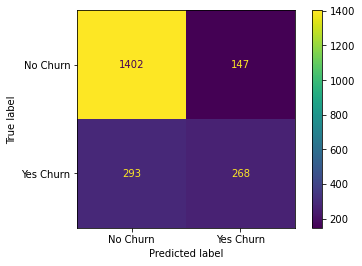

In [9]:
plot_confusion_matrix(svm,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Churn','Yes Churn']);
print(svm.score(X_test, y_test))

***
<a id='opts'></a>
## 5. Optimizing with different kernels and optimal parameters

In [10]:
param_grid = [{'C': [0.5, 1, 10], #C must be > 0
              'gamma':['auto'],
              'kernel':['linear','poly','rbf'],
              }]
optimal_parameters = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=0)
# change verbose to 2 to see what is happening internally
optimal_parameters.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10], 'gamma': ['auto'],
                          'kernel': ['linear', 'poly', 'rbf']}],
             scoring='accuracy')

In [11]:
means = optimal_parameters.cv_results_['mean_test_score']
stddevs = optimal_parameters.cv_results_['std_test_score']
params = optimal_parameters.cv_results_['params']
print('Mean AUC (+/- standard deviation), for parameters')
for mean, std, params in zip(means, stddevs, params):
    print("%0.3f (+/- %0.03f) for %r"
          % (mean, std, params))

print(optimal_parameters.best_params_)

Mean AUC (+/- standard deviation), for parameters
0.796 (+/- 0.015) for {'C': 0.5, 'gamma': 'auto', 'kernel': 'linear'}
0.798 (+/- 0.007) for {'C': 0.5, 'gamma': 'auto', 'kernel': 'poly'}
0.797 (+/- 0.011) for {'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}
0.796 (+/- 0.015) for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.799 (+/- 0.010) for {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.798 (+/- 0.010) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.797 (+/- 0.015) for {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
0.776 (+/- 0.011) for {'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
0.785 (+/- 0.014) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}


In [12]:
svm_final = SVC(random_state=42, C=1, gamma='auto', kernel='poly').fit(X_train, y_train.values.ravel())
print('Training_accuracy =', svm_final.score(X_train, y_train))

Training_accuracy = 0.822429906542056


Testing_accuracy =  0.7886255924170616


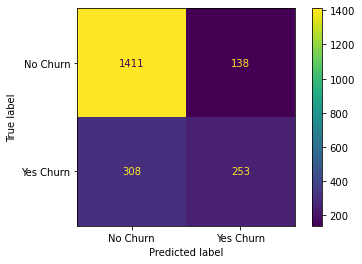

In [13]:
plot_confusion_matrix(svm_final,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Churn','Yes Churn']);
print('Testing_accuracy = ', svm_final.score(X_test, y_test))

***
<a id='finals'></a>
## Building, Evaluating Drawing and interpreting the final SVM

Let's now use <a href=https://de.wikipedia.org/wiki/Hauptkomponentenanalyse >**Principal Component Analysis**</a>. to plot the 30-dimensional dataset.

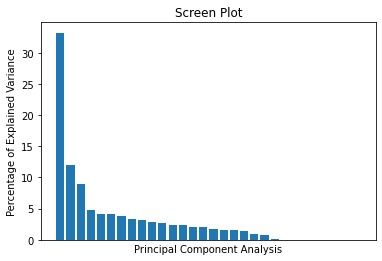

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca= pca.fit_transform(X_train)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(axis='x',
               which='both',
               bottom=False,
               labelbottom=False,
               top=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component Analysis')
plt.title('Screen Plot')
plt.show()

In [15]:
train_pc1 = X_pca[:, 0]
train_pc2 = X_pca[:, 1]

pca_train_scaled= StandardScaler().fit_transform(np.column_stack((train_pc1, train_pc2)))

param_grid = [{'C': [0.5, 1, 10], #C must be > 0
              'gamma':['auto', 'scale'],
              'kernel':['poly']}]

optimal_parameters = GridSearchCV(SVC(),
                             param_grid,
                             cv=5,
                             scoring='accuracy',
                             verbose=0)
optimal_parameters.fit(pca_train_scaled, y_train.values.ravel())

means = optimal_parameters.cv_results_['mean_test_score']
stddevs = optimal_parameters.cv_results_['std_test_score']
params = optimal_parameters.cv_results_['params']
print('Mean AUC (+/- standard deviation), for parameters')
for mean, std, params in zip(means, stddevs, params):
    print("%0.3f (+/- %0.03f) for %r"
          % (mean, std, params))

print(optimal_parameters.best_params_)

Mean AUC (+/- standard deviation), for parameters
0.769 (+/- 0.005) for {'C': 0.5, 'gamma': 'auto', 'kernel': 'poly'}
0.769 (+/- 0.005) for {'C': 0.5, 'gamma': 'scale', 'kernel': 'poly'}
0.770 (+/- 0.006) for {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.770 (+/- 0.006) for {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
0.771 (+/- 0.008) for {'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
0.771 (+/- 0.008) for {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}


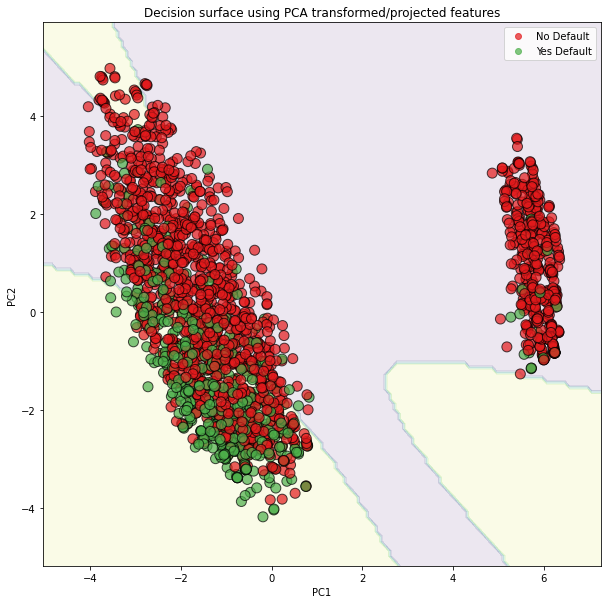

In [16]:
import matplotlib.colors as colors

svm = SVC(random_state=42, C=10, gamma='auto', kernel='poly').fit(pca_train_scaled, y_train.values.ravel())

X_test_pca = pca.transform(X_test)
test_pc1 = X_test_pca[:, 0]
test_pc2 = X_test_pca[:, 1]

x_min = test_pc1.min() - 1
x_max = test_pc1.max() + 1
y_min = test_pc2.min() - 1
y_max = test_pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

Z = svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)


fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx, yy, Z, alpha=0.1)
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

scatter = ax.scatter(test_pc1, test_pc2, c=y_test.values.ravel(),
                    cmap= cmap,
                    s=100,
                    edgecolors='k',
                    alpha=0.7)
legend = ax.legend(scatter.legend_elements()[0],
                  scatter.legend_elements()[1],
                  loc='upper right')
legend.get_texts()[0].set_text('No Default')
legend.get_texts()[1].set_text('Yes Default')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using PCA transformed/projected features')
plt.show()